<a href="https://colab.research.google.com/github/Herbertkid/5G_Impact_On_Canada_GDP/blob/main/QGDPimpact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


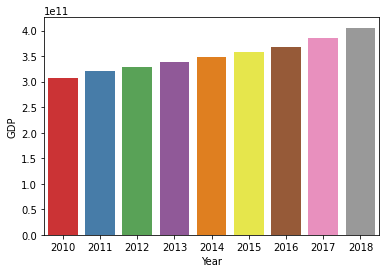

In [ ]:
dfCAGDP = pd.read_csv('/content/qgdp.csv')
dfCAGDP['GDPgrowth'] = (dfCAGDP['GDP'] - dfCAGDP['GDP'].shift(1))
sns.barplot(x='Year', y='GDP', data=dfCAGDP, palette='Set1')

In [ ]:
dfCAGDP = dfCAGDP.dropna()
dfCAGDP

,Year,GDP,GDPgrowth
1,2011,3.210470e+11,1.438300e+10
2,2012,3.288560e+11,7.809000e+09
3,2013,3.382140e+11,9.358000e+09
4,2014,3.480980e+11,9.884000e+09
5,2015,3.577590e+11,9.661000e+09
6,2016,3.686350e+11,1.087600e+10
7,2017,3.864070e+11,1.777200e+10
8,2018,4.056140e+11,1.920700e+10


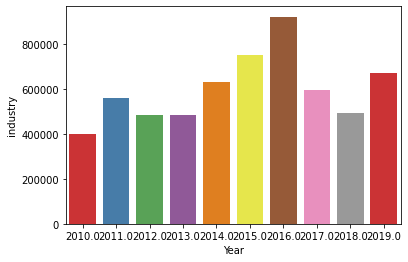

In [ ]:
dfex = pd.read_csv('/content/qexpenditure.csv')
dfex['industry'] = dfex['industry']/1000
sns.barplot(x='Year', y='industry', data=dfex, palette='Set1')

In [ ]:
def calculateEX(xk, industry):
  a = 4.464
  b = 0.000165
  land = 1542056
  return (xk/pow(0.6214,2)*b+a)*pow(0.6214,2)*land+industry
def wrapper(row):
  return calculateEX(row['xk'],row['industry'])
def calculateEXxin(xk):
  a = 4.464
  b = 0.000165
  land = 1542056
  return (xk/pow(0.6214,2)*b+a)*pow(0.6214,2)*land
def wrapperxin(row):
  return calculateEXxin(row['xk'])

In [ ]:
dfex['expenditure'] = dfex.apply(wrapper, axis=1)
dfex['expenditurexIN'] = dfex.apply(wrapperxin, axis=1)
dfex['exgrowth'] = (dfex['expenditure'] - dfex['expenditure'].shift(1)).dropna()
dfex = dfex.dropna()
dfex

,Year,land,xk,industry,expenditure,expenditurexIN,exgrowth
1,2011.0,"1,542,056",5.90,562300.0,3.221874e+06,2.659574e+06,162515.266354
2,2012.0,"1,542,056",5.94,484000.0,3.143584e+06,2.659584e+06,-78289.822430
3,2013.0,"1,542,056",5.98,485800.0,3.145394e+06,2.659594e+06,1810.177570
4,2014.0,"1,542,056",6.01,631200.0,3.290802e+06,2.659602e+06,145407.633177
5,2015.0,"1,542,056",6.03,752000.0,3.411607e+06,2.659607e+06,120805.088785
6,2016.0,"1,542,056",6.06,923400.0,3.583014e+06,2.659614e+06,171407.633177
7,2017.0,"1,542,056",6.12,597300.0,3.256930e+06,2.659630e+06,-326084.733646
8,2018.0,"1,542,056",6.18,492800.0,3.152445e+06,2.659645e+06,-104484.733646
9,2019.0,"1,542,056",6.25,670400.0,3.330063e+06,2.659663e+06,177617.810747


In [ ]:
dfCAGDP['exgrowth'] = dfex['exgrowth']
dfCAGDP['multiplier'] = abs(dfCAGDP['GDPgrowth']/ dfCAGDP['exgrowth']).dropna(axis=0)
dfCAGDP['Year'] = pd.to_datetime(dfCAGDP['Year'],format='%Y')
dfCAGDP.index = dfCAGDP['Year']
dfCAGDP['multiplier']['2013-01-01'] = dfCAGDP['multiplier']['2013-01-01']/100
dfCAGDP['multiplier']['2018-01-01'] = dfCAGDP['multiplier']['2018-01-01']/2
dfCAGDP

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Year,GDP,GDPgrowth,exgrowth,multiplier
Year,,,,,
2011-01-01,2011-01-01,3.210470e+11,1.438300e+10,162515.266354,88502.454709
2012-01-01,2012-01-01,3.288560e+11,7.809000e+09,-78289.822430,99744.765764
2013-01-01,2013-01-01,3.382140e+11,9.358000e+09,1810.177570,51696.585778
2014-01-01,2014-01-01,3.480980e+11,9.884000e+09,145407.633177,67974.423241
2015-01-01,2015-01-01,3.577590e+11,9.661000e+09,120805.088785,79971.796695
2016-01-01,2016-01-01,3.686350e+11,1.087600e+10,171407.633177,63451.083236
2017-01-01,2017-01-01,3.864070e+11,1.777200e+10,-326084.733646,54501.171525
2018-01-01,2018-01-01,4.056140e+11,1.920700e+10,-104484.733646,91912.949049


In [ ]:

dfex['Year'] = pd.to_datetime(dfex['Year'],format='%Y')  
dfex.index = dfex['Year']
dfex

,Year,land,xk,industry,expenditure,expenditurexIN,exgrowth
Year,,,,,,,
2011-01-01,2011-01-01,"1,542,056",5.90,562300.0,3.221874e+06,2.659574e+06,162515.266354
2012-01-01,2012-01-01,"1,542,056",5.94,484000.0,3.143584e+06,2.659584e+06,-78289.822430
2013-01-01,2013-01-01,"1,542,056",5.98,485800.0,3.145394e+06,2.659594e+06,1810.177570
2014-01-01,2014-01-01,"1,542,056",6.01,631200.0,3.290802e+06,2.659602e+06,145407.633177
2015-01-01,2015-01-01,"1,542,056",6.03,752000.0,3.411607e+06,2.659607e+06,120805.088785
2016-01-01,2016-01-01,"1,542,056",6.06,923400.0,3.583014e+06,2.659614e+06,171407.633177
2017-01-01,2017-01-01,"1,542,056",6.12,597300.0,3.256930e+06,2.659630e+06,-326084.733646
2018-01-01,2018-01-01,"1,542,056",6.18,492800.0,3.152445e+06,2.659645e+06,-104484.733646
2019-01-01,2019-01-01,"1,542,056",6.25,670400.0,3.330063e+06,2.659663e+06,177617.810747


In [ ]:
import statsmodels.api as sm
 

fit1 = sm.tsa.statespace.SARIMAX(dfCAGDP['multiplier'], order=(5,0, 1), seasonal_order=(0, 0, 0, 12)).fit()
y_pred3 = fit1.predict(start="2019-01-01", end="2030-01-01", dynamic=True)
fitindustry = sm.tsa.statespace.SARIMAX(dfex['industry'], order=(4,0, 0), seasonal_order=(0, 0, 0, 12)).fit()
y_predindustry = fitindustry.predict(start="2019-01-01", end="2030-01-01", dynamic=True)
fitpo = sm.tsa.statespace.SARIMAX(dfex['xk'], order=(4,0, 0), seasonal_order=(0, 0, 0, 12)).fit()
y_predpo = fitpo.predict(start="2019-01-01", end="2030-01-01", dynamic=True)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, 

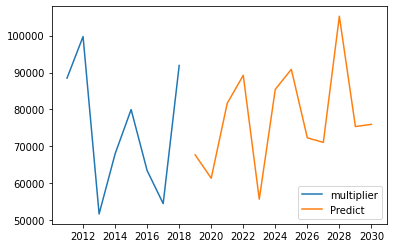

In [ ]:
plt.plot(dfCAGDP['Year'],dfCAGDP['multiplier'], label='multiplier')
plt.plot(y_pred3.index,y_pred3.values, label='Predict')
plt.legend(loc='best')

In [ ]:
y_pred3.values/30

array([2256.13321288, 2045.73503543, 2722.51626158, 2974.97212398,
       1856.71835288, 2847.43721013, 3029.17746727, 2410.48973972,
       2369.05490849, 3508.43667317, 2512.31547193, 2532.0666751 ])

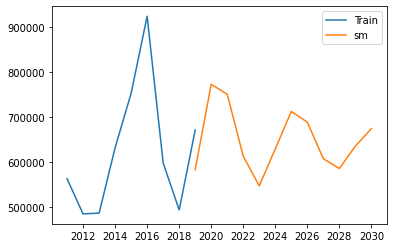

In [ ]:
plt.plot(dfex['Year'],dfex['industry'], label='Train')
plt.plot(y_predindustry.index,y_predindustry.values, label='sm')
plt.legend(loc='best')

In [ ]:
y_predindustry.values

array([582473.59348989, 772066.08971347, 749926.75081592, 612167.50844274,
       546357.79060588, 628567.01155225, 711808.30484153, 687798.70772166,
       606621.77587588, 584920.53791525, 634812.57558934, 673540.74241322])

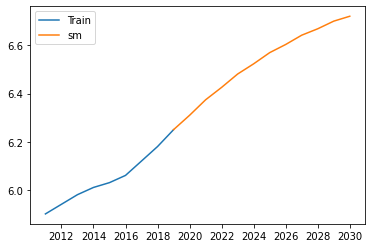

In [ ]:
plt.plot(dfex['Year'],dfex['xk'], label='Train')
plt.plot(y_predpo.index,y_predpo.values, label='sm')
plt.legend(loc='best')

In [ ]:
x3_pred = np.array([2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030])
dfpred3 = pd.DataFrame({'Year': x3_pred, 'multiplier': y_pred3.values, 'xk':y_predpo.values, 'industry':y_predindustry.values})

dfpred3['Year'] = pd.to_datetime(dfpred3['Year'],format='%Y')  
dfpred3.index = dfpred3['Year']
dfpred3

,Year,multiplier,xk,industry
Year,,,,
2019-01-01,2019-01-01,67683.996386,6.250118,582473.593490
2020-01-01,2020-01-01,61372.051063,6.309783,772066.089713
2021-01-01,2021-01-01,81675.487847,6.374277,749926.750816
2022-01-01,2022-01-01,89249.163720,6.425846,612167.508443
2023-01-01,2023-01-01,55701.550586,6.481288,546357.790606
2024-01-01,2024-01-01,85423.116304,6.523660,628567.011552
2025-01-01,2025-01-01,90875.324018,6.570169,711808.304842
2026-01-01,2026-01-01,72314.692192,6.604075,687798.707722
2027-01-01,2027-01-01,71071.647255,6.642667,606621.775876


In [ ]:
dfpred3['expenditure'] = dfpred3.apply(wrapper, axis=1)
dfpred3['exgrowth'] = (dfpred3['expenditure'] - dfpred3['expenditure'].shift(1)).dropna()

dfpred3['exgrowth'][0] = dfpred3['expenditure'][0] - dfex['expenditure']['2018-01-01']
dfpred3['GDPgrowth'] = abs(dfpred3['exgrowth']*dfpred3['multiplier'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
dfpred3.insert(dfpred3.shape[1],'GDP',0)
dfpred3['GDP'][0] = dfpred3['GDPgrowth'][0]+405614000000
for i in range(1,len(dfpred3)):
  dfpred3['GDP'][i] = dfpred3['GDPgrowth'][i]+dfpred3['GDP'][i-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
dfpred3

,Year,multiplier,xk,industry,expenditure,exgrowth,GDPgrowth,GDP
Year,,,,,,,,
2019-01-01,2019-01-01,67683.996386,6.250118,582473.593490,3.242136e+06,89691.434291,6.070675e+09,411684674714
2020-01-01,2020-01-01,61372.051063,6.309783,772066.089713,3.431744e+06,189607.677368,1.163661e+10,423321286771
2021-01-01,2021-01-01,81675.487847,6.374277,749926.750816,3.409621e+06,-22122.929253,1.806901e+09,425128187810
2022-01-01,2022-01-01,89249.163720,6.425846,612167.508443,3.271875e+06,-137746.121151,1.229373e+10,437421913928
2023-01-01,2023-01-01,55701.550586,6.481288,546357.790606,3.206079e+06,-65795.611166,3.664918e+09,441086831491
2024-01-01,2024-01-01,85423.116304,6.523660,628567.011552,3.288299e+06,82220.001945,7.023489e+09,448110320279
2025-01-01,2025-01-01,90875.324018,6.570169,711808.304842,3.371553e+06,83253.127006,7.565655e+09,455675975171
2026-01-01,2026-01-01,72314.692192,6.604075,687798.707722,3.347552e+06,-24000.970072,1.735623e+09,457411597934
2027-01-01,2027-01-01,71071.647255,6.642667,606621.775876,3.266384e+06,-81167.112467,5.768680e+09,463180278319


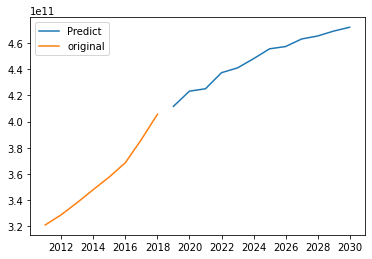

In [ ]:
dfpred3
plt.plot(dfpred3['Year'],dfpred3['GDP'], label='Predict')
plt.plot(dfCAGDP['Year'],dfCAGDP['GDP'], label='original')
plt.legend(loc='best')

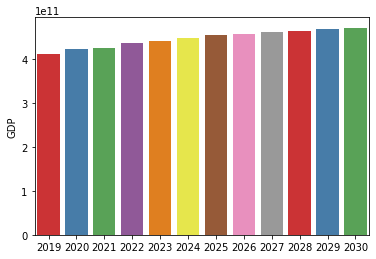

In [ ]:
x3_pred = np.array([2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030])
sns.barplot(x=x3_pred, y='GDP', data=dfpred3, palette='Set1')